In [2]:
# Imports

import importlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats, fft
import scipy.signal as signal
import statsmodels.api as sm
import seaborn as sns
import math
import numpy as np
import matplotlib as mpl
import matplotlib
import os
from matplotlib.ticker import FormatStrFormatter
#from pyts.decomposition import SingularSpectrumAnalys isl
import nktools as nk
import nkplot as nkp
import inspect
import re
from dotmap import DotMap
from scipy.optimize import curve_fit


importlib.reload(nk)
importlib.reload(nkp)

#plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

# some info for charting
# Some universal graphic constants
std_mult = 3
neg_std_mult = 3
cm = 1/2.54

# Read the Data and functiosn

In [3]:
# Negatives

hpv16_neg_filepath = '../../data/raw_data/03082023_hpv16_neg_clinical.csv'

neg5_wells = {'bhq': ['D1', 'E1', 'F1'], 'tamra': ['A1', 'B1', 'C1']}
neg6_wells = {'bhq': ['D2', 'E2', 'F2'], 'tamra': ['A2', 'B2', 'C2']}
neg9_wells = {'bhq': ['D3', 'E3', 'F3'], 'tamra': ['A3', 'B3', 'C3']}
neg10_wells = {'bhq': ['D4', 'E4', 'F4'], 'tamra': ['A4', 'B4', 'C4']}
neg13_wells = {'bhq': ['D5', 'E5', 'F5'], 'tamra': ['A5', 'B5', 'C5']}
neg15_wells = {'bhq': ['D6', 'E6', 'F6'], 'tamra': ['A6', 'B6', 'C6']}
neg16_wells = {'bhq': ['D7', 'E7', 'F7'], 'tamra': ['A7', 'B7', 'C7']}
neg19_wells = {'bhq': ['D8', 'E8', 'F8'], 'tamra': ['A8', 'B8', 'C8']}

allneg_wells = {'bhq': ['D1', 'E1', 'F1', 'D2', 'E2', 'F2', 'D3', 'E3', 'F3', 'D4', 'E4', 'F4', 'D5', 'E5', 'F5', 'D6', 'E6', 'F6', 'D7', 'E7', 'F7', 'D8', 'E8', 'F8'],
                'tamra': ['A1', 'B1', 'C1', 'A2', 'B2', 'C2', 'A3', 'B3', 'C3', 'A4', 'B4', 'C4', 'A5', 'B5', 'C5', 'A6', 'B6', 'C6', 'A7', 'B7', 'C7', 'A8', 'B8', 'C8']}

neg5_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg5_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg6_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg6_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg9_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg9_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg10_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg10_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg13_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg13_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg15_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg15_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg16_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg16_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg19_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg19_wells, fam_range=(62, 141), tamra_range=(146, 225))

allneg_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, allneg_wells, fam_range=(62, 141), tamra_range=(146, 225))

allneg_qavg = allneg_data['quotient_stats']['mean']
allneg_qstd = allneg_data['quotient_stats']['stdev']
allneg_bhqavg = allneg_data['fam_bhq_stats']['mean']
allneg_bhqstd = allneg_data['fam_bhq_stats']['stdev']


In [4]:
# Read in positive data

# The original data
hpv16_pos_filepath = '../../data/raw_data/03082023_hpv16_pos_clinical.csv'

pos11_wells = {'bhq': ['J1', 'K1', 'L1'], 'tamra': ['G1', 'H1', 'I1']}
pos12_wells = {'bhq': ['J2', 'K2', 'L2'], 'tamra': ['G2', 'H2', 'I2']}
pos14_wells = {'bhq': ['J4', 'K4', 'L4'], 'tamra': ['G4', 'H4', 'I4']}
pos17_wells = {'bhq': ['J7', 'K7', 'L7'], 'tamra': ['G7', 'H7', 'I7']}


pos11_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos11_wells)
pos12_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos12_wells)
pos14_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos14_wells)
pos17_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos17_wells)

# The redos

pos13_wellsR = {'bhq': ['D9', 'E9', 'F9'], 'tamra': ['A9', 'B9', 'C9']}
pos15_wellsR = {'bhq': ['D10', 'E10', 'F10'], 'tamra': ['A10', 'B10', 'C10']}
pos16_wellsR = {'bhq': ['D11', 'E11', 'F11'], 'tamra': ['A11', 'B11', 'C11']}
pos18_wellsR = {'bhq': ['D12', 'E12', 'F12'], 'tamra': ['A12', 'B12', 'C12']}

hpv16_pos_filepathR = '../../data/raw_data/05082023_hpv16_pos_clinical_selectredo.csv'

pos13_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos13_wellsR, fam_range=(62, 141), tamra_range=(143, 222))
pos15_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos15_wellsR, fam_range=(62, 141), tamra_range=(143, 222))
pos16_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos16_wellsR, fam_range=(62, 141), tamra_range=(143, 222))
pos18_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos18_wellsR, fam_range=(62, 141), tamra_range=(143, 222))

samples = {'11': pos11_data, 
           '12': pos12_data,
           '13': pos13_data,
           '14': pos14_data,
           '15': pos15_data,
           '16': pos16_data,
           '17': pos17_data,
           '18': pos18_data}
cts = {'11': 21.68, 
           '12': 32.70,
           '13': 29.38,
           '14': 33.66,
           '15': 30.80,
           '16': 28.35,
           '17': 21.26,
           '18': 34.39}

In [5]:
def clinical_tts(pdf, neg_stats, nstdev=3, req_len_sep=4, n_samples=1, use_pos_stdev=False):
     """
     pdf is positive dataframe and should have index as time, with cols 
     for each indiovidual sample. neg stats should be a stats df for the negatives,
     with one column 'mean' and andother 'stdev' 
     """
     adj_neg_val = neg_stats['mean'] + (nstdev * neg_stats['stdev'])

     asdf = pd.DataFrame()
     sdf_stds = pdf.std(axis=1)
     for cname in pdf.columns:
        asdf[cname] = pdf[cname] - (use_pos_stdev * nstdev * sdf_stds)

     #print(asdf)

     #harmonix indices so that dfs can be compared
     # Here I am just going ot assume that hte step in between the different dfs is
     # the same, and the mismatch is that one expt was cut off a bit early

     min_idx = max(min(asdf.index), min(*adj_neg_val.index))
     max_idx = min(max(asdf.index), max(adj_neg_val.index))
     #print(min_idx, max_idx)
     asdf = asdf.loc[min_idx:max_idx].copy()
     adj_neg_val = adj_neg_val.loc[min_idx:max_idx].copy()

     

     # Now we need to mask it to get where asdf is greater than andf
     tracker_df = pd.DataFrame(columns=asdf.columns)


     for cname in asdf.columns:
         #print(asdf[cname].index, '\n------------------\n', adj_neg_val.index)
         tracker_df[cname] = asdf[cname].where(asdf[cname] > adj_neg_val, 0)

     tracker_df.mask(tracker_df > 0.0, 1, inplace=True)

     rolling_avg = tracker_df.rolling(window=req_len_sep).mean()

     #print('ra:', rolling_avg)

     #print(rolling_avg)
     times = {}

     for sample in rolling_avg.columns:
         try:
             times[sample] = rolling_avg[rolling_avg[sample] == 1].index[0]
         except:
             times[sample] = np.nan

     v = np.array(list(times.values()))
     v = v[~np.isnan(v)]
     if len(v) < n_samples:
         m = float('nan')
         s = 0
     else:
         m = np.nanmean(v)
         s = np.nanstd(v)
     #print(v)
     stats = {
         'mean': m,
         'std': s,
     }
        
     #print(times, stats)
     return times, stats



# 5A: the Heatmap

In [6]:
neg_ct_symbol = 'X'
neg_ct_value = 0.0
neg_tts_value = 0.0

samples_quot_tts_mean = {}
samples_bhq_tts_mean = {}

samples_quot_tts_stdev = {}
samples_bhq_tts_stdev = {}

samples_quot_tts_ind = {}
samples_bhq_tts_ind = {}

use_pos_stdev = False

for k,v in samples.items():
    print(k)
    qtimes, quottts = clinical_tts(v['quotient'], allneg_data['quotient_stats'], use_pos_stdev=use_pos_stdev)
    bhqtimes, bhqtts = clinical_tts(v['fam_bhq_data'], allneg_data['fam_bhq_stats'], use_pos_stdev=use_pos_stdev)
    print(qtimes)

    samples_quot_tts_mean[k] = quottts['mean']
    samples_bhq_tts_mean[k] = bhqtts['mean']
    samples_quot_tts_stdev[k] = quottts['std']
    samples_bhq_tts_stdev[k] = bhqtts['std']
    samples_quot_tts_ind[k] = list(qtimes.values())
    samples_bhq_tts_ind[k] = list(bhqtimes.values())


heatmap_data_inv2 = np.array([[samples_quot_tts_ind['11'][0],samples_quot_tts_ind['11'][1], samples_quot_tts_ind['11'][2]],
                            [samples_bhq_tts_ind['11'][0], samples_bhq_tts_ind['11'][1], samples_bhq_tts_ind['11'][2]],
                            [samples_quot_tts_ind['12'][0],samples_quot_tts_ind['12'][1], samples_quot_tts_ind['12'][2]],
                            [samples_bhq_tts_ind['12'][0], samples_bhq_tts_ind['12'][1], samples_bhq_tts_ind['12'][2]],
                            [samples_quot_tts_ind['13'][0],samples_quot_tts_ind['13'][1], samples_quot_tts_ind['13'][2]],
                            [samples_bhq_tts_ind['13'][0], samples_bhq_tts_ind['13'][1], samples_bhq_tts_ind['13'][2]],
                            [samples_quot_tts_ind['14'][0],samples_quot_tts_ind['14'][1], samples_quot_tts_ind['14'][2]],
                            [samples_bhq_tts_ind['14'][0], samples_bhq_tts_ind['14'][1], samples_bhq_tts_ind['14'][2]],
                            [samples_quot_tts_ind['15'][0],samples_quot_tts_ind['15'][1], samples_quot_tts_ind['15'][2]],
                            [samples_bhq_tts_ind['15'][0], samples_bhq_tts_ind['15'][1], samples_bhq_tts_ind['15'][2]],
                            [samples_quot_tts_ind['16'][0],samples_quot_tts_ind['16'][1], samples_quot_tts_ind['16'][2]],
                            [samples_bhq_tts_ind['16'][0], samples_bhq_tts_ind['16'][1], samples_bhq_tts_ind['16'][2]],
                            [samples_quot_tts_ind['17'][0],samples_quot_tts_ind['17'][1], samples_quot_tts_ind['17'][2]],
                            [samples_bhq_tts_ind['17'][0], samples_bhq_tts_ind['17'][1], samples_bhq_tts_ind['17'][2]],
                            [samples_quot_tts_ind['18'][0],samples_quot_tts_ind['18'][1], samples_quot_tts_ind['18'][2]],
                            [samples_bhq_tts_ind['18'][0], samples_bhq_tts_ind['18'][1], samples_bhq_tts_ind['18'][2]],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value],
                            [neg_ct_value, neg_tts_value, neg_tts_value]
                            ])

heatmap_data_inv2 = np.nan_to_num(heatmap_data_inv2)

ctarr = np.array([[cts['11']],
 [cts['12']],
 [cts['13']],
 [cts['14']],
 [cts['15']],
 [cts['16']],
 [cts['17']],
 [cts['18']],
 [neg_ct_value],
    [neg_ct_value],
    [neg_ct_value],
    [neg_ct_value],
    [neg_ct_value],
    [neg_ct_value],
    [neg_ct_value],
    [neg_ct_value]]
)


sample_tick_labels = ['Positive 1',
                      'Positive 2',
                      'Positive 3',
                      'Positive 4',
                      'Positive 5',
                      'Positive 6',
                      'Positive 7',
                      'Positive 8',
                      'Negative 1',
                      'Negative 2',
                      'Negative 3',
                      'Negative 4',
                      'Negative 5',
                      'Negative 6',
                      'Negative 7',
                      'Negative 8']

11
{'G1': 360, 'H1': 360, 'I1': 360}
12
{'G2': 360, 'H2': 360, 'I2': 360}
13
{'A9': 2520, 'B9': 840, 'C9': 960}
14
{'G4': nan, 'H4': nan, 'I4': nan}
15
{'A10': 360, 'B10': 360, 'C10': 480}
16
{'A11': 600, 'B11': 600, 'C11': 720}
17
{'G7': 360, 'H7': 480, 'I7': 480}
18
{'A12': 600, 'B12': 960, 'C12': 960}


(0.0, 3.0) (32.0, 0.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


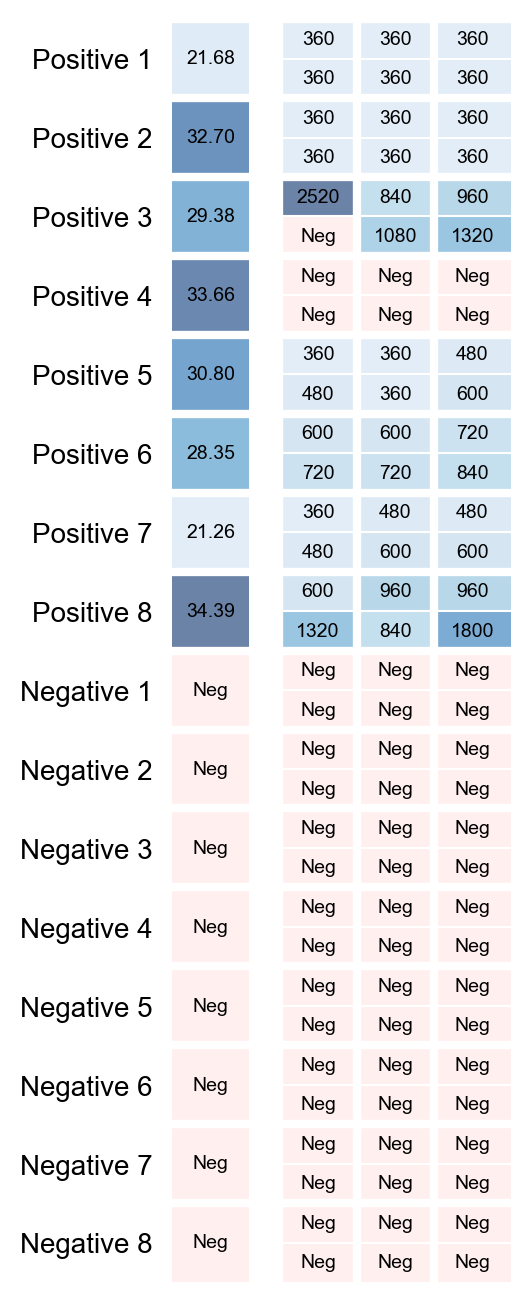

In [7]:
intesample_space = 3
intrasample_space = .75

intersample_plotspace = .05
intrasample_plotspace = .15

not_significant_symbol = 'Neg'

ocolormap = mpl.colormaps['Blues']
colors = ocolormap(np.linspace(0.2, 1.0, 8192))
colors[:,3] = 0.6
colors[0] = [255/255, 109/255, 106/255, .1]
colormap = mpl.colors.ListedColormap(colors)

#colors = colormap(np.linspace(0, 1, len(data_dict.keys())))



Z = np.random.rand(18, 3)
Z= heatmap_data_inv2

fig, ax = plt.subplots(1,2, figsize=(7*cm, 16.8*cm), gridspec_kw={'width_ratios': [1, 3]}, dpi=200)

vmn = sorted(set(Z.flatten()))[1] - 1
vmx = sorted(set(Z.flatten()))[-1]

vmnct = sorted(set(ctarr.flatten()))[1] - .01
vmxct = sorted(set(ctarr.flatten()))[-1]

c1 = ax[0].pcolormesh(ctarr, cmap=colormap, shading='flat', vmin=vmnct, vmax=vmxct)
c2 = ax[1].pcolormesh(Z, cmap=colormap, shading='flat', vmin=vmn, vmax=vmx)

#print('color range: ', np.multiply(), 255), ' to ', np.multiply(colormap(1), 255))
#print('neg color: ', colormap(0))
#print(f'pcr range is {} to {}')


# Reset all ticks on all the axis and make spines invisible

ax[0].set_xticks([], minor=True)
ax[0].set_xticks([], minor=False)
ax[0].set_yticks([], minor=True)
ax[0].set_yticks([], minor=False)

ax[0].spines[:].set_visible(False)

ax[1].set_xticks([], minor=True)
ax[1].set_xticks([], minor=False)
ax[1].set_yticks([], minor=True)
ax[1].set_yticks([], minor=False)

ax[1].spines[:].set_visible(False)



# Now remake the ticks as I want them

ax[1].set_xticks(np.arange(Z.shape[1]), minor=True)
ax[1].set_yticks(np.arange(Z.shape[0]/2)*2, minor=True)
ax[1].set_yticks(np.arange(Z.shape[0]/2)*2 + 1, minor=False)
#ax[1].set_xticks(np.arange(Z.shape[1])+0.5, minor=False, labels=['Replicate 1', 'Replicate 2', 'Replicate 3'], rotation=45, ha='center', va='bottom')

ax[0].set_yticks(np.arange(ctarr.shape[0]), minor=True)
ax[0].set_yticks(np.arange(ctarr.shape[0])+0.5, minor=False, labels=sample_tick_labels)
#ax[0].set_xticks(np.arange(ctarr.shape[1])+0.5, minor=False, labels=['PCR Ct'], rotation=45, ha='center', va='bottom')



# Invert the y axis
ax[0].invert_yaxis()
ax[1].invert_yaxis()


# Turn off markins I dont want

ax[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False,
    labeltop=True) # labels along the bottom edge are off

#ax[1].xaxis.tick_top()

#ax[1].xaxis.set_ticks_position('none') 
#Ax[1].yaxis.set_ticks_position('none')

ax[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=True,
    labeltop=True) # labels along the bottom edge are off


# Turn the girdlines one
ax[1].grid(which="minor", color="w", linestyle='-', linewidth=intesample_space, snap=True)
ax[1].grid(which="major", color="w", linestyle='-', linewidth=intrasample_space, snap=True)
ax[0].grid(which="minor", color="w", linestyle='-', linewidth=intesample_space, snap=True)


# Now we label squares:

for row in range(Z.shape[0]):
    for col in range(Z.shape[1]):
        s = not_significant_symbol if Z[row, col] < 0.05 else f'{Z[row, col]:.0f}'
            
        ax[1].text(col + 0.5, row + 0.5, s,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=7,
            color='k')

for row in range(ctarr.shape[0]):
    for col in range(ctarr.shape[1]):
        s = not_significant_symbol if ctarr[row, col] < 0.05 else f'{ctarr[row, col]:.2f}'
            
        ax[0].text(col + 0.5,
            row + 0.5,
            s,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=7,
            color='k')


print(ax[1].get_xlim(), ax[1].get_ylim())


fig.tight_layout()
fig.savefig('./charts/5A_table.png', dpi=2000)
fig.savefig('./charts/5A_table.svg', dpi=2000)
fig.savefig('./charts/5A_table.eps', dpi=2000)
plt.show()

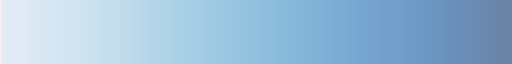

In [8]:
colormap

# 5B: BHQ TTS vs TAMRA TTS

/var/folders/g4/cjms28gd4hn9wy923zjttby40000gp/T/ipykernel_85116/2427431966.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  a.scatter(x, y, c=clist[sidx], s=12, marker=smybs[i], label=f'{i+11}')


[(360, 360), (360, 360), (360, 360), (360, 360), (360, 360), (360, 360), (nan, 2520), (1080, 840), (1320, 960), (nan, nan), (nan, nan), (nan, nan), (480, 360), (360, 360), (600, 480), (720, 600), (720, 600), (840, 720), (480, 360), (600, 480), (600, 480), (1320, 600), (840, 960), (1800, 960)]


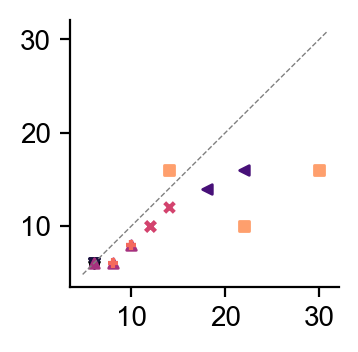

In [ ]:
f, a = plt.subplots(figsize=(4.4*cm, 4.4*cm), dpi=200)



quot_tts_vals = [samples_quot_tts_ind['11'][0], samples_quot_tts_ind['11'][1], samples_quot_tts_ind['11'][2],
                samples_quot_tts_ind['12'][0], samples_quot_tts_ind['12'][1], samples_quot_tts_ind['12'][2],
                samples_quot_tts_ind['13'][0], samples_quot_tts_ind['13'][1], samples_quot_tts_ind['13'][2],
                samples_quot_tts_ind['14'][0], samples_quot_tts_ind['14'][1], samples_quot_tts_ind['14'][2],
                samples_quot_tts_ind['15'][0], samples_quot_tts_ind['15'][1], samples_quot_tts_ind['15'][2],
                samples_quot_tts_ind['16'][0], samples_quot_tts_ind['16'][1], samples_quot_tts_ind['16'][2],
                samples_quot_tts_ind['17'][0], samples_quot_tts_ind['17'][1], samples_quot_tts_ind['17'][2],
                samples_quot_tts_ind['18'][0], samples_quot_tts_ind['18'][1], samples_quot_tts_ind['18'][2],
]

bhq_tts_vals = [samples_bhq_tts_ind['11'][0], samples_bhq_tts_ind['11'][1], samples_bhq_tts_ind['11'][2],
                samples_bhq_tts_ind['12'][0], samples_bhq_tts_ind['12'][1], samples_bhq_tts_ind['12'][2],
                samples_bhq_tts_ind['13'][0], samples_bhq_tts_ind['13'][1], samples_bhq_tts_ind['13'][2],
                samples_bhq_tts_ind['14'][0], samples_bhq_tts_ind['14'][1], samples_bhq_tts_ind['14'][2],
                samples_bhq_tts_ind['15'][0], samples_bhq_tts_ind['15'][1], samples_bhq_tts_ind['15'][2],
                samples_bhq_tts_ind['16'][0], samples_bhq_tts_ind['16'][1], samples_bhq_tts_ind['16'][2],
                samples_bhq_tts_ind['17'][0], samples_bhq_tts_ind['17'][1], samples_bhq_tts_ind['17'][2],
                samples_bhq_tts_ind['18'][0], samples_bhq_tts_ind['18'][1], samples_bhq_tts_ind['18'][2],
]

ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0, 0.8, int(len(quot_tts_vals)/3)))
clist = [colors[0], colors[0], colors[0], colors[1], colors[1], colors[1], colors[2], colors[2], colors[2],
            colors[3], colors[3], colors[3], colors[4], colors[4], colors[4], colors[5], colors[5], colors[5],
            colors[6], colors[6], colors[6], colors[7], colors[7], colors[7]]


#a.set_xlim(0, 2000)
#a.set_ylim(0, 2000)
#a.set_xticks([0, 500, 1000, 1500, 2000])
#a.set_yticks([0, 500, 1000, 1500, 2000])
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)

#a.scatter(bhq_tts_vals, quot_tts_vals, c=clist, s=12)

smybs = ['p', 'v', '<', '>', '^', 'x', '+', 's']

for i in range(int(len(bhq_tts_vals)/3)):
    sidx = i*3
    eidx = sidx+3
    x = nk.tc(bhq_tts_vals[sidx:eidx])
    y = nk.tc(quot_tts_vals[sidx:eidx])
    a.scatter(x, y, c=clist[sidx], s=12, marker=smybs[i], label=f'{i+11}')


if False:
    a.legend()
    a.set_xlabel('BHQ TTS (moin)')
    a.set_ylabel('Quotient TTS (min)')



xx= np.arange(*a.get_xlim())
a.plot(xx, xx, c='gray', linestyle='--', linewidth=0.5)

print(list(zip(bhq_tts_vals, quot_tts_vals)))

plt.savefig('./charts/fig5B_BHQ_vs_Quot_TTS.png', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig5B_BHQ_vs_Quot_TTS.svg', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig5B_BHQ_vs_Quot_TTS.eps', dpi=2000, bbox_inches='tight')